In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Define the path to your Excel file
file_path = '/content/drive/MyDrive/Untitled folder/Usa Analysis Combined (1).xlsx'  # Adjust this path to match your Google Drive structure

# Load the dataset using the openpyxl engine
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the dataframe
df.head()

,Date,Open,High,Low,Close,Volume,Monthly_Inflation_rate,Annual Inflation Rate,TWEXBGSMTH,M1SL
0,2024-06-01,5297.15,5523.64,5234.32,5460.48,76025620000,-0.1,3.0,124.0309,NaN
1,2024-05-01,5029.03,5341.88,5011.05,5277.51,86849720000,0.0,3.3,122.2444,18036.4
2,2024-04-01,5257.97,5263.95,4953.56,5035.69,81747170000,0.3,3.4,122.5142,17990.0
3,2024-03-01,5098.51,5264.85,5056.82,5254.35,86299510000,0.4,3.5,121.0413,17998.2
4,2024-02-01,4861.11,5111.06,4853.52,5096.27,82066930000,0.4,3.2,121.4155,17935.2


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values or handle them as needed
df.dropna(inplace=True)

# Convert date column to datetime format if necessary
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the cleaned dataframe
df.head()

,Open,High,Low,Close,Volume,Monthly_Inflation_rate,Annual Inflation Rate,TWEXBGSMTH,M1SL
Date,,,,,,,,,
2024-05-01,5029.03,5341.88,5011.05,5277.51,86849720000,0.0,3.3,122.2444,18036.4
2024-04-01,5257.97,5263.95,4953.56,5035.69,81747170000,0.3,3.4,122.5142,17990.0
2024-03-01,5098.51,5264.85,5056.82,5254.35,86299510000,0.4,3.5,121.0413,17998.2
2024-02-01,4861.11,5111.06,4853.52,5096.27,82066930000,0.4,3.2,121.4155,17935.2
2024-01-01,4745.20,4931.09,4682.11,4845.65,81737880000,0.3,3.1,120.5769,17977.0


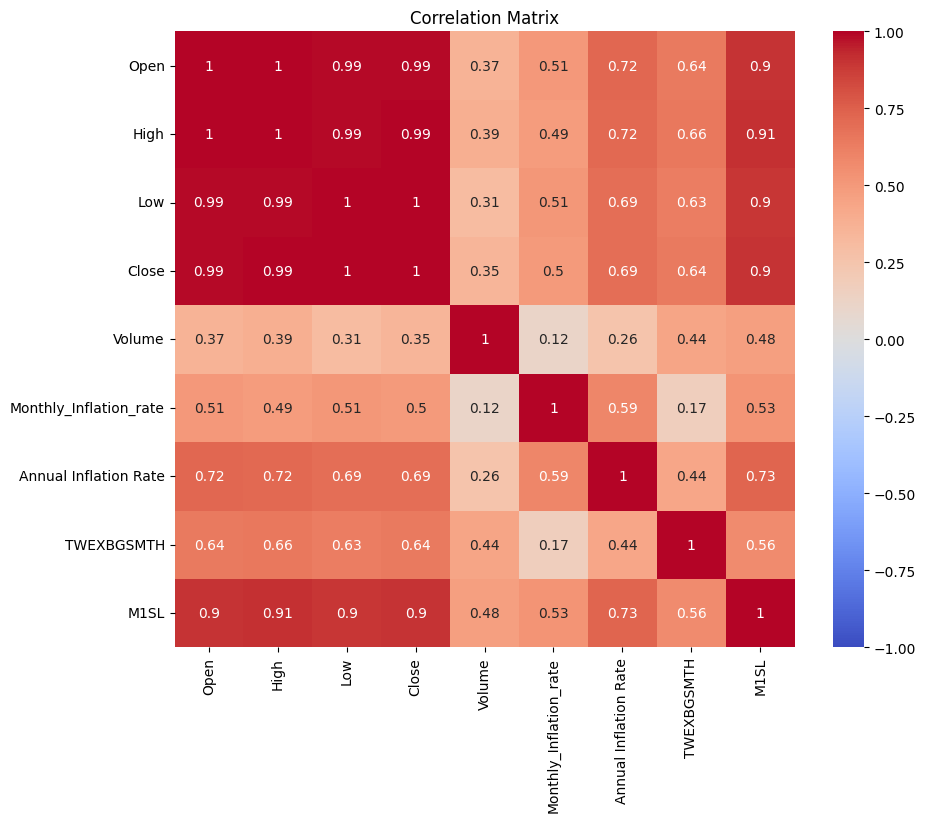

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

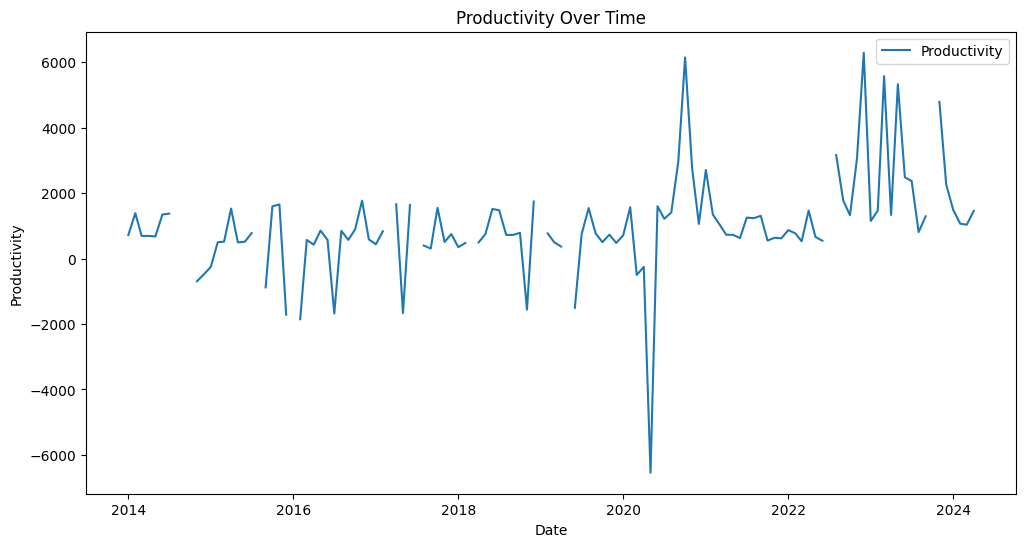

In [ ]:
# Theoretical framework: Assuming productivity = (M1 Money Supply / Inflation Rate) * Exchange Rate / Stock Market Index
df['Productivity'] = (df['M1SL'] / df['Monthly_Inflation_rate']) * df['TWEXBGSMTH'] / df['Close']  # Close is used as the Stock Market Index

# Plot the productivity over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Productivity'], label='Productivity')
plt.title('Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.show()

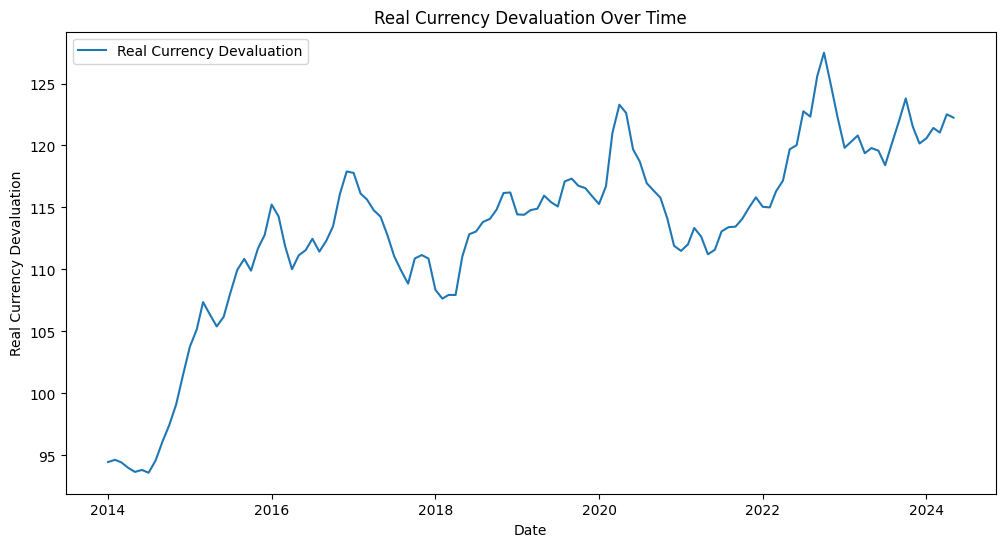

In [ ]:
# Assuming a reference currency with flat M1 growth and stable productivity
reference_currency_exchange_rate = 1  # Assuming a stable exchange rate of 1 for simplicity

df['Real Currency Devaluation'] = df['TWEXBGSMTH'] / reference_currency_exchange_rate

# Plot the real currency devaluation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Real Currency Devaluation'], label='Real Currency Devaluation')
plt.title('Real Currency Devaluation Over Time')
plt.xlabel('Date')
plt.ylabel('Real Currency Devaluation')
plt.legend()
plt.show()

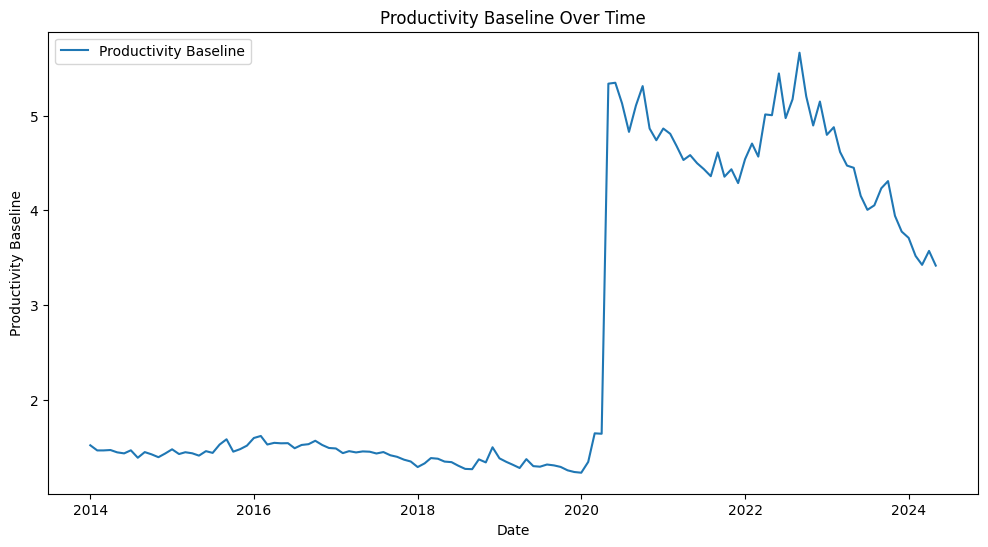

In [ ]:

;
0


\\# Example formula for productivity baseline: (M1 Money Supply / Stock Market Index)
df['Productivity Baseline'] = df['M1SL'] / df['Close']

# Plot the productivity baseline over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Productivity Baseline'], label='Productivity Baseline')
plt.title('Productivity Baseline Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity Baseline')
plt.legend()
plt.show()